 # **1.손글씨 데이터셋 살펴보기**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
# digits

In [ ]:
# digits 데이터셋에서 사용 가능한 키(속성)들을 확인
# data.shape: data 배열의 형태(shape)를 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
data = digits['data']
data.shape # 1797개 데이터와 64의 필드

(1797, 64)

In [ ]:
target = digits['target']
target.shape  # 정답 데이터

(1797,)

In [ ]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
import matplotlib.pyplot as plt

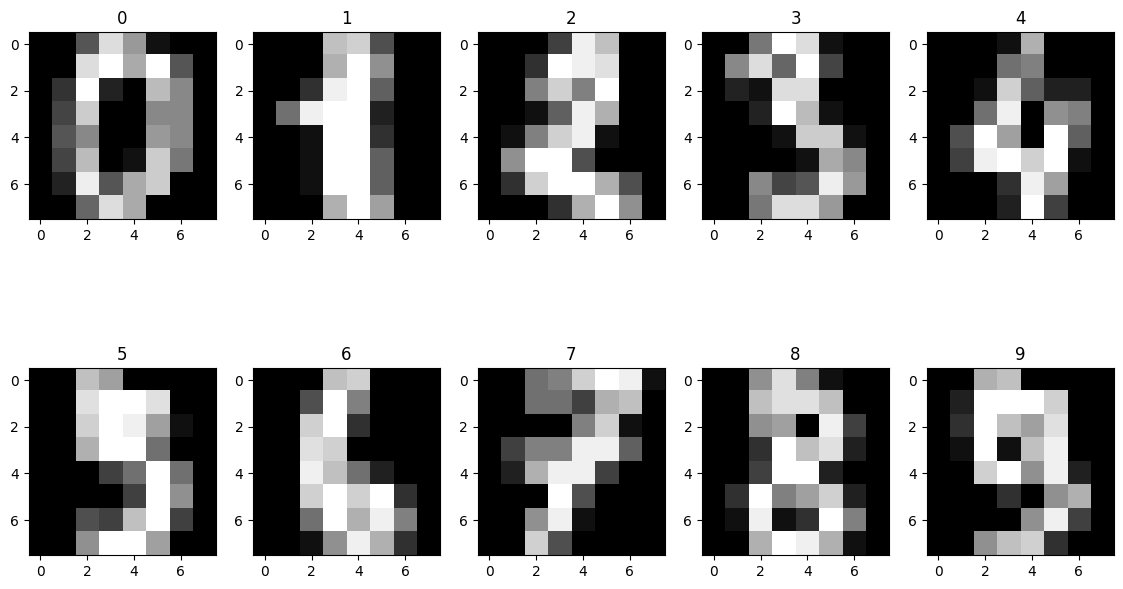

In [ ]:
_, axes = plt.subplots(2, 5, figsize=(14,8))

for i, ax in enumerate(axes.flatten()):
  ax.imshow(data[i].reshape((8, 8)), cmap='gray') # 1열로 되어있는 64 필드를 8*8로 바꿔라 # 밝기정보 음영
  ax.set_title(target[i])

# **2. 스케일링(Scaling)**
* 데이터를 특정한 스케일로 통일하는 것
* 다차원의 값들을 비교 분석하기 쉽게 만들어주며, 자료의 오버플로우나 언더플로우를 방지하여 최적화 과정에서의 안정성 및 수렴 속도를 향상
* 데이터를 모델링하기 전에 거치는 것이 좋음

### 2-1. 스케일링의 종류
* StandardScaler: 평균과 표쥰편차를 사용
* MinMaxScaler: 최대, 최소값이 각각 1과 0이 되도록 스케일링
* RobustScaler: 중앙값과 IQR사용(4분위수)(아웃라이어의 영향을 최소화)

In [ ]:
import pandas as pd

In [ ]:
movie = {'naver': [2, 4, 6, 8, 10], 'netflix': [1, 2, 3, 4, 5]}

In [ ]:
movie = pd.DataFrame(movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
# 영화 평점 데이터를 Min-Max 스케일링을 사용하여 정규화
min_max_scaler = MinMaxScaler()

In [ ]:
min_max_scaler = min_max_scaler.fit_transform(movie)
min_max_scaler

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

In [ ]:
pd.DataFrame(min_max_scaler, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


### 2-2. 정규화(Normalization)
* 값의 범위(Scale)을 0 ~ 1사이의 값으로 바꿔주는 것
* 학습 전에 Scaling을 하는 것
* 머신러닝, 딥러닝에서 Scale이 큰 Feature의 영향이 비대해지는 것을 방지
* scikit-learn에서 MinMaxScaler 사용

In [ ]:
# digits 데이터셋에서 첫 번째 이미지 데이터 출력
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# 최소-최대 스케일링(Min-Max Scaling)하여 정규화
scaler = MinMaxScaler()

In [ ]:
# data에 최소-최대 스케일링을 적용
# fit_transform() 메서드는 데이터를 변환하면서 스케일링을 수행
# 이후 scaled 변수에 변환된 데이터가 저장
scaled= scaler.fit_transform(data)
scaled[0]
# 변환된 데이터 중 첫 번째 데이터를 출력
# 이는 최소-최대 스케일링이 적용된 후의 첫 번째 데이터

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

### 2-3. 표준화(Standardization)
* 값의 번위(Scale)를 평균 0, 분산 1이 되도록 바꿔주는 것
* 학습 전에 Scaling 하는 것
* 머신러닝, 딥러닝에서 Scale이 큰 Feature의 영향이 비대해지는 것을 방지
* 정규분포를 표준정규분포로 변환하는 것과 같음
* scikit-learn에서 StanardScaler 사용

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size =0.2, random_state=2024)

In [ ]:
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [ ]:
X_test.shape, y_test.shape

((360, 64), (360, 64))

# **3.Support Vector Machine(SVM)**

<center><img src="https://i.imgur.com/l1NQNvD.png" width="700px"></center>

* 두 클래스로부터 최대한 멀리 떨어져 있는 결정 경계를 찾는 분류기
* 특정 조건을 만족하는 동시에 클래스를 분류하는 것을 목표로 함

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
model = SVC() #객체생성

```
X_train:
설명: 학습 데이터의 입력(특성) 부분
역할: 모델을 학습시키기 위해 사용되는 데이터의 특성 값들

X_test:
설명: 테스트 데이터의 입력(특성) 부분
역할: 학습된 모델을 평가하기 위해 사용되는 데이터의 특성 값들

y_train:
설명: 학습 데이터의 출력(레이블) 부분
역할: 모델을 학습시키기 위해 사용되는 데이터의 정답(레이블) 값들

y_test:
설명: 테스트 데이터의 출력(레이블) 부분
역할: 학습된 모델을 평가하기 위해 사용되는 데이터의 정답(레이블) 값들
```

In [ ]:
# fit 모델의 파라미터를 조정하여 데이터를 잘 설명할 수 있도록 하는 과정
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# accuracy_score() 함수: 실제 레이블과 예측값을 비교하여 정확도를 계산
# 따라서 이 코드는 모델의 예측값과 실제 레이블 간의 정확도를 계산
accuracy_score(y_test,y_pred)

0.9888888888888889

In [ ]:
print (y_test[10],y_pred[10])

7 7


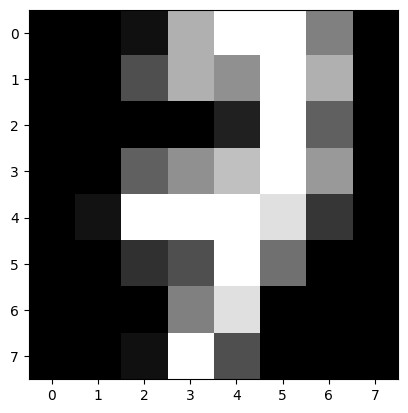

In [ ]:
plt.imshow(X_test[10].reshape(8,8), cmap='gray')
plt.show()

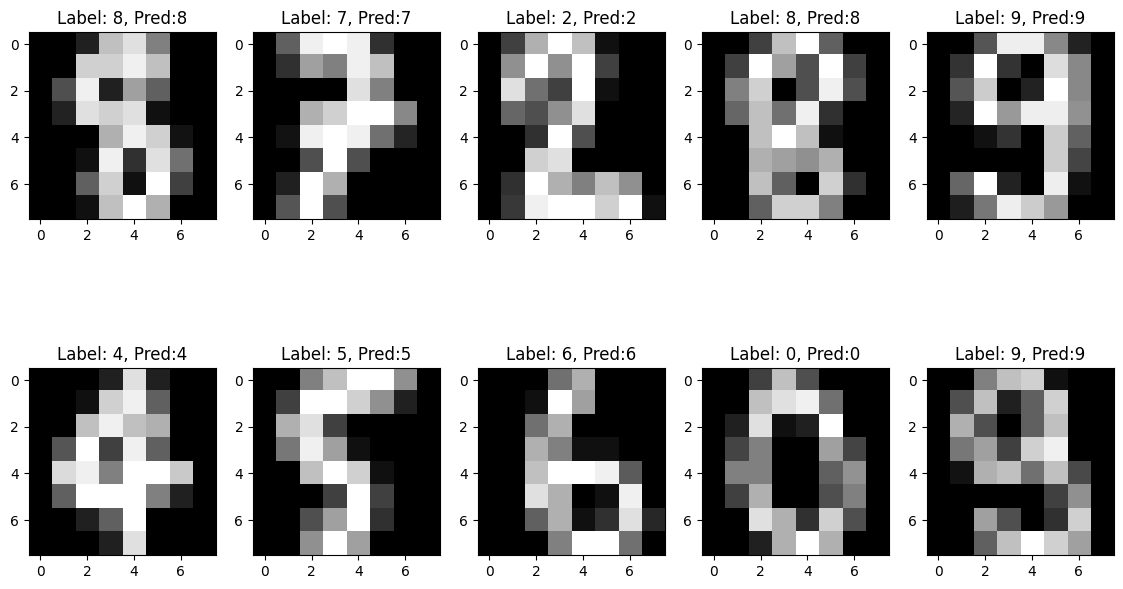

In [ ]:
_, axes = plt.subplots(2, 5, figsize=(14,8))

# enumerate는 반복 가능한 객체(iterable)를 입력으로 받아 인덱스와 해당 요소를 튜플로 반환하는 반복자를 생성
# 반복문에서 인덱스와 요소를 동시에 사용할 수 있습니다.
for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_test[i].reshape((8, 8)), cmap='gray') # 1열로 되어있는 64 필드를 8*8로 바꿔라 # 밝기정보 음영
  ax.set_title(f'Label: {y_test[i]}, Pred:{y_pred[i]}')

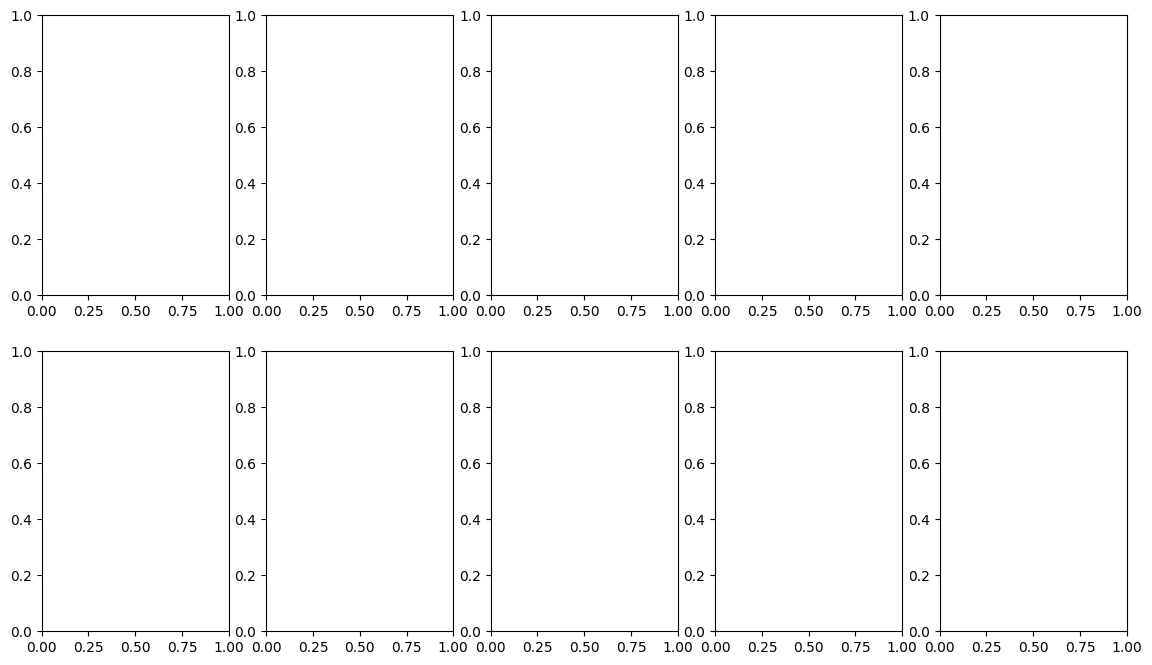

In [ ]:
a, b = plt.subplots(2, 5, figsize=(14,8))

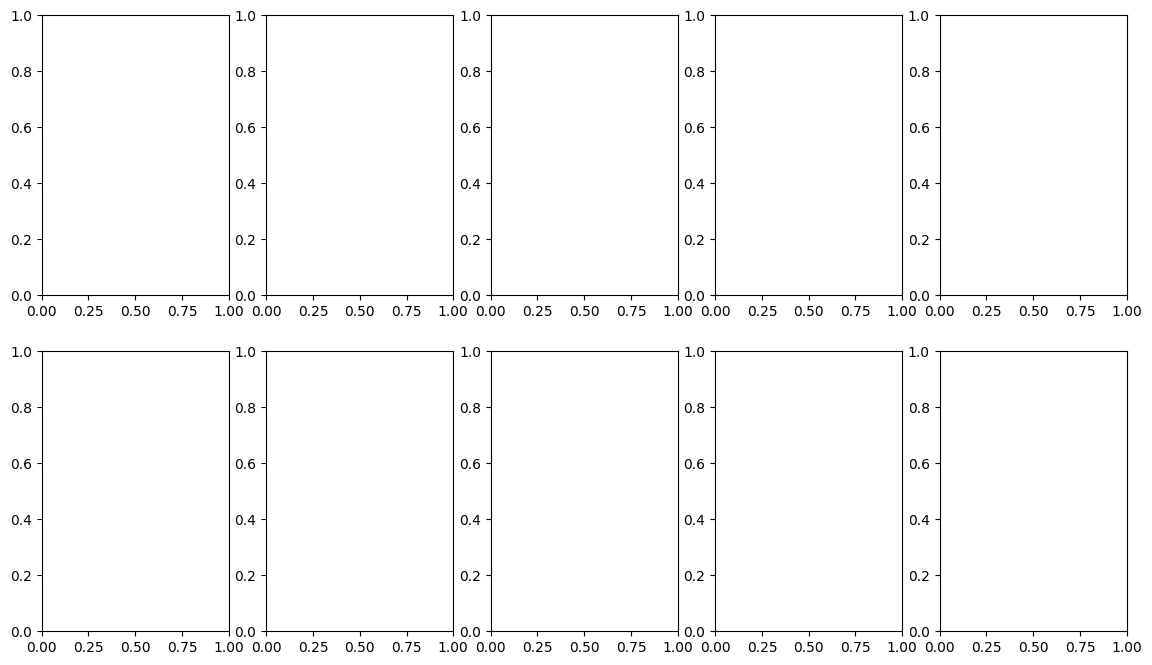

In [ ]:
a

In [ ]:
b

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)